**Problem Statement:**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Data Ingestion:
1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

Data Preparation:
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

Modelling:
1. Apply Logistic Regression and LDA (linear discriminant analysis).
2. Apply KNN Model and Naïve Bayes Model. Interpret the results.
3. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

Inference:
1. Based on these predictions, what are the insights? 

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

**Importing Libraries**

In [99]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (5 Marks)

In [100]:
df=pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [101]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [102]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


With the help of head and tail, we can confirm that data has been loaded successfully

In [103]:
print("Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset has 1525 rows and 10 columns


In [104]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Dataset has 1525 rows of data and 10 columns. Out of which 2 columns have data type as object and 8 as int64.

In [17]:
print(start+ "Total number of duplicate values in dataset ="+ end,df.duplicated().sum())

Total number of duplicate values in dataset = 0


In [15]:
start = "\033[1m"
end = "\033[0;0m"
print(start+ "ColumnWise Null values:"+ end)
print(df.isnull().sum())
print("\n")
print(start+"Total null Values in dataset ="+ end,df.isnull().sum().sum())

ColumnWise Null values:
Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


Total null Values in dataset = 0


In [16]:
print(start+ "Name of all the columns of the dataset are:\n"+ end,df.columns)

Name of all the columns of the dataset are:
 Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')


In [23]:
print(start+ "Describe function for all the int64 columns:\n"+ end)
df.describe().T

Describe function for all the int64 columns:



,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


Observations from describe function for int64 columns:
1. Age of Voters varies from 24 to 93 years. The range of age values is higher than any of the other variables and they have higher standard deviation.
2. Range of values for columns: 'economic.cond.national', 'economic.cond.household', 'Blair' and 'Hague' is same.Out of these variables 'economic.cond.national' has the lowest standard deviation, which states that values of this column are close to mean. Column 'Hague' has highest standard deviation among them.
3. Mean of Europe is slightly on higher side in comparison to the range. 
4. For political.knowledge values range between 0 to 3. 

In [24]:
print(start+ "Describe function for all the object columns:\n"+ end)
df.describe(include='object').transpose()

Describe function for all the object columns:



,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


vote and gender are the two object columns and both have 2 unique values. Labour is among the top as per frequency in vote column and female in gender.

In [14]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

As per dataset, Labour party has the majority of the vote and is ahead of Conservative party by more than double (approx) the vote received by Conservative Party.

In [18]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [19]:
print(start+ "Unique values in each Columns:"+ end)
for column in df.columns:
    if column != 'age':
        print(column,': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('------------------------------------------------------------------\n')

Unique values in each Columns:
vote :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64
------------------------------------------------------------------

economic.cond.national :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64
------------------------------------------------------------------

economic.cond.household :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64
------------------------------------------------------------------

Blair :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64
------------------------------------------------------------------

Hague :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64
------------------------------------------------------------------

Europe :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64
----

In [106]:
for column in df.columns:
    if column != 'age':
        print(column,"has",': ',df[column].nunique(),"uniques types")

Unnamed: 0 has :  1525 uniques types
vote has :  2 uniques types
economic.cond.national has :  5 uniques types
economic.cond.household has :  5 uniques types
Blair has :  5 uniques types
Hague has :  5 uniques types
Europe has :  11 uniques types
political.knowledge has :  4 uniques types
gender has :  2 uniques types


In [25]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


Data does not show good collinerity among independent variables.

**Graph presentation**

# Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

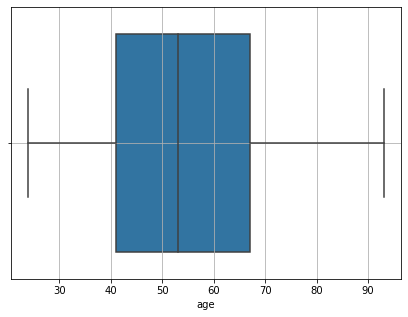

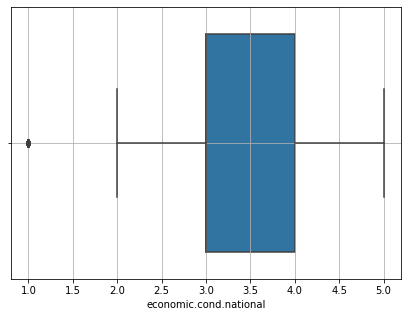

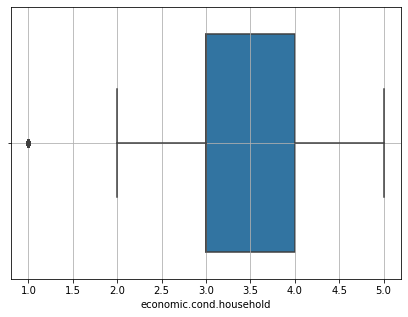

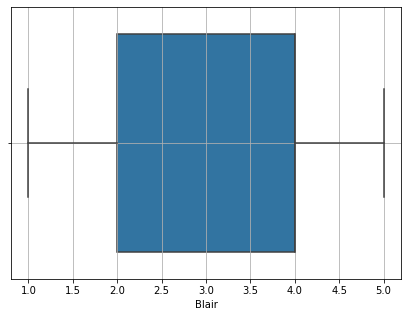

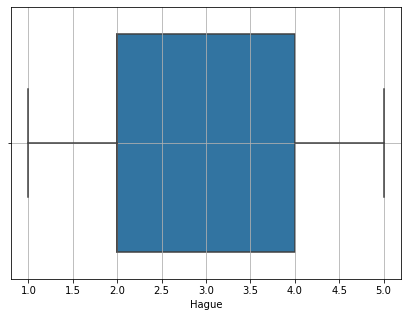

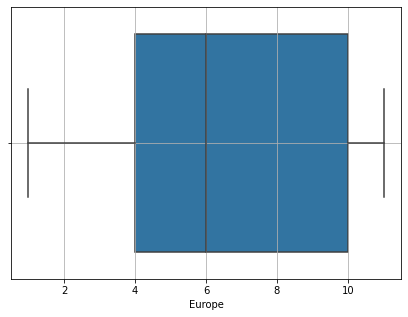

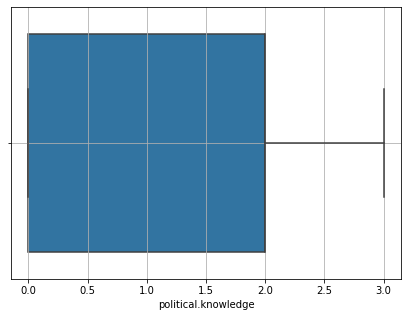

In [33]:
for i in df.columns: 
    if df[i].dtype == 'int64': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.boxplot(df[i],whis=1.5)
        plt.grid()
        plt.show();

Among columns having int64 as data types only economic.cond.national and economic.cond.household shows outlier on lower end.

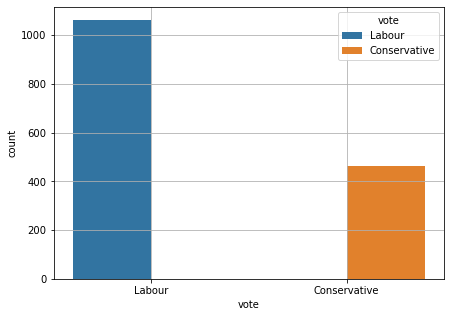

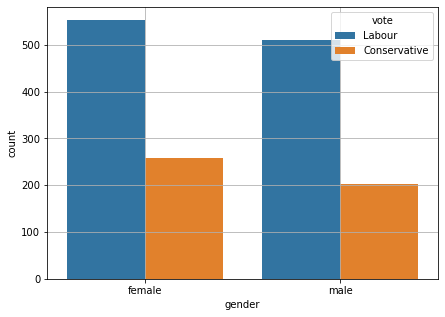

In [26]:
for i in df.columns: 
    if df[i].dtype == 'object': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.countplot(x=df[i],hue =df['vote'])
        plt.grid()
        plt.show();

Female voters are more in comparision to male. Graph shows there is not much difference between female and male voters and for both the parties the male and female votes have approximately same difference.

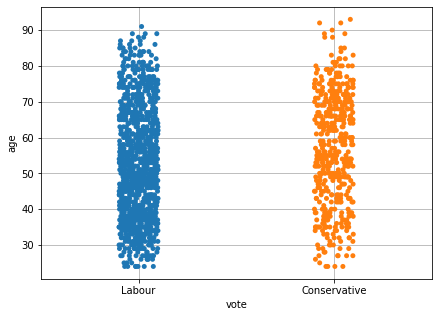

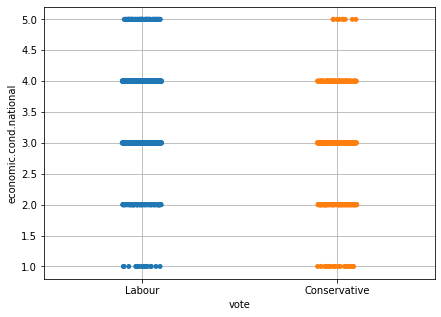

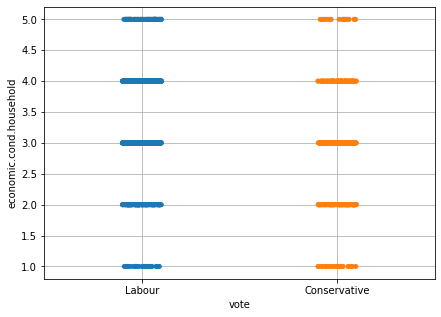

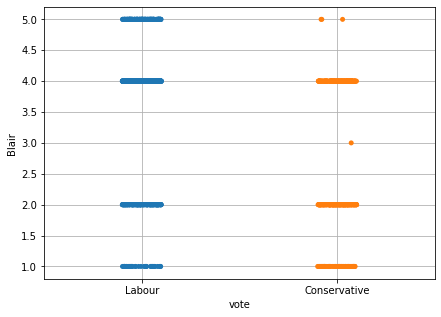

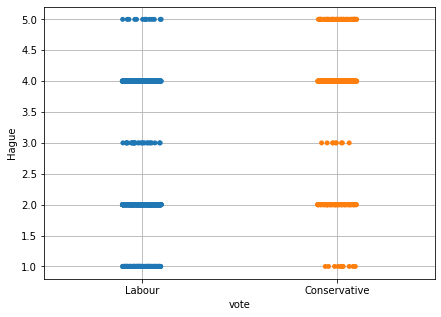

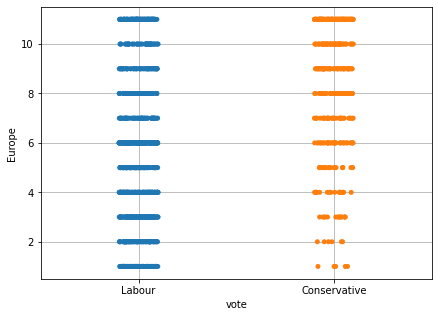

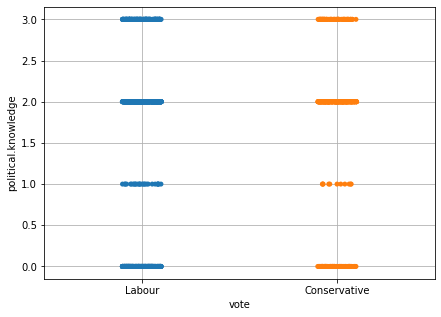

In [31]:
for i in (df.select_dtypes(['int64'])).columns:
    plt.rcParams['figure.figsize'] = 7,5
    sns.stripplot(df['vote'], df[i])
    plt.grid()
    plt.show()

To check the spread of columns having int64 as columns with dependent variable that is vote, strip plot is created. Below are the observations:
1. For age, it shows denser data for Labour Party voters, which means labour party has more data points. Whereas for Conservative party, the spread is slighly higher than labour party.
2. In economic.cond.national, at category 1 the spread is less dense than other category For Labour Party whereas for Conservative Party, the spread is not much wide at point 5.
3. In economic.cond.household, at level 1 and 5 Labour party shows more dense in comparison to conservative.
4. For Blair, In labour party, there is 0 assessment at level 3, whereas for Conservative Party at level 3 and 5 very low assessment can be seen. 
5. Whereas in assessment of Conservative leader that is in column Hague, Conservative party has more dense at level 5. But at level 3 and 1 Labour party shows more dense records.
6. For European integration Labour party shows mixed response at all levels but Conservative party shows more dense records at 6 and above levels.
7. Knowledge of parties position at European integration, at level 1 the spread is low in comparision to different leves. 

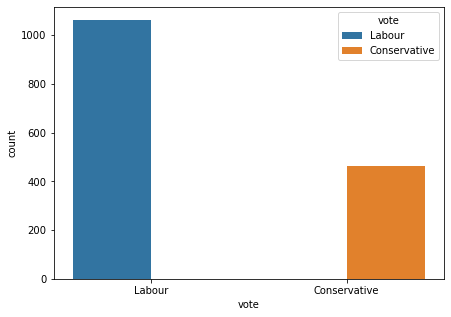

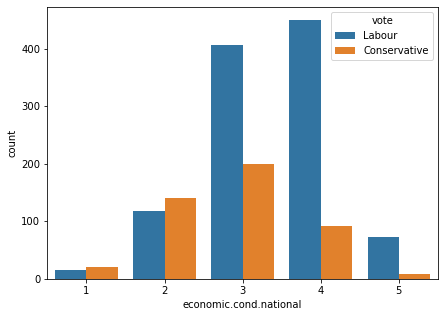

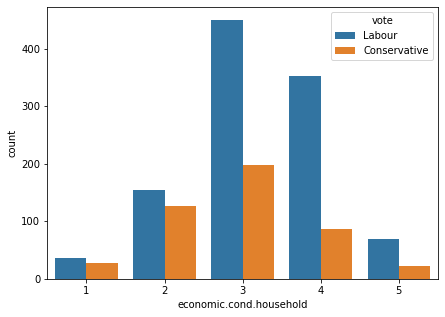

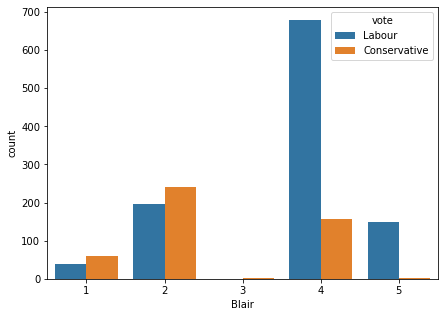

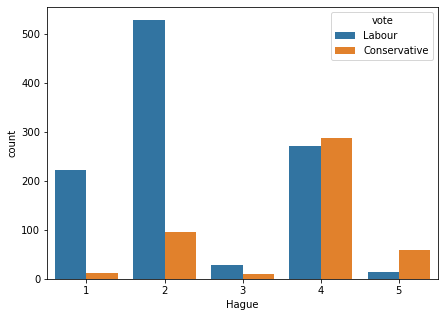

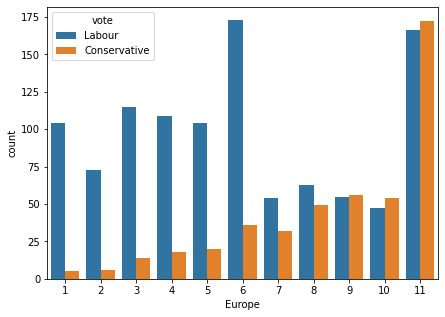

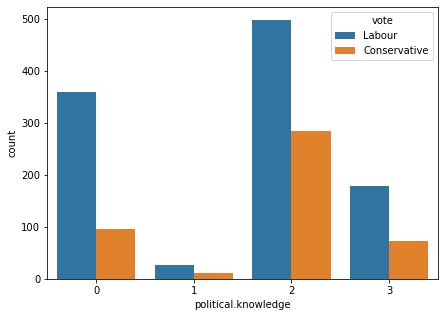

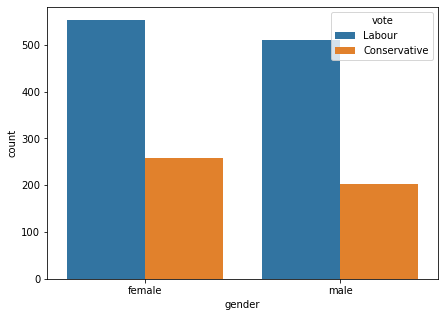

In [32]:
for column in df.columns:
    if column != 'age':
        sns.countplot(x=column, hue='vote', data=df)
        plt.show()

For checking number of response by voters, we used countplot, below are the observations:
1. For economic.cond.national, labour Party voters opted maximum at level 4 and next is level 3. Whereas for conservative party, level 3 is highest and then level 2. So we can say for Labour party national economic condition is better.
2. Same trend is their for household economic condition, except that, here highest for Labour party is 3 and then 4.
3. In Blair, level 4 shows maximum for Labour party and 2 for conservative party.
4. In Hague, level 2 shows maximum for labour and level 4 for conservative party.
5. For Europe Integration, level 6 shows highest for Labour and level 11 for Conserative. We can say that Conservative party has ‘Eurosceptic’ sentiment.
6. For political knowledge level 2 shows highest in labour party and same for conservative as well.
7. More Female voters than male.

C:\Users\ranja\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ranja\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


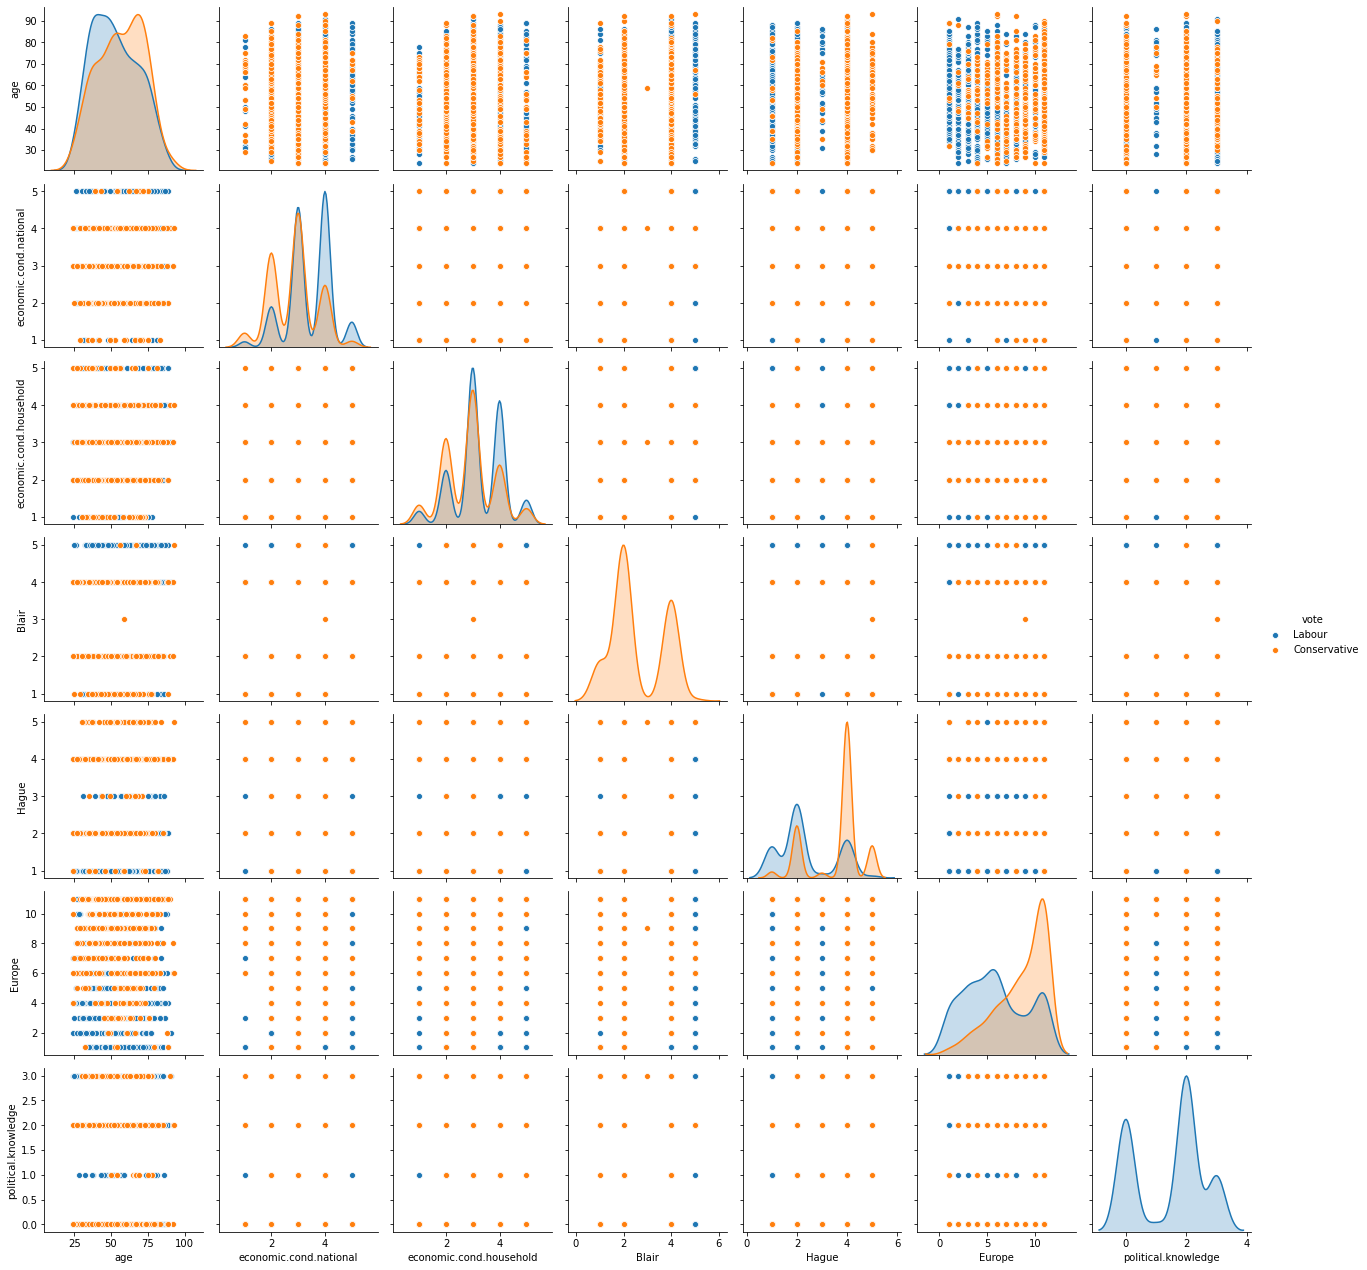

In [34]:
sns.pairplot(data=df,hue='vote')

With the help of pairplot, we can see there is no trend among independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C6DE1B188>,
      dtype=object)

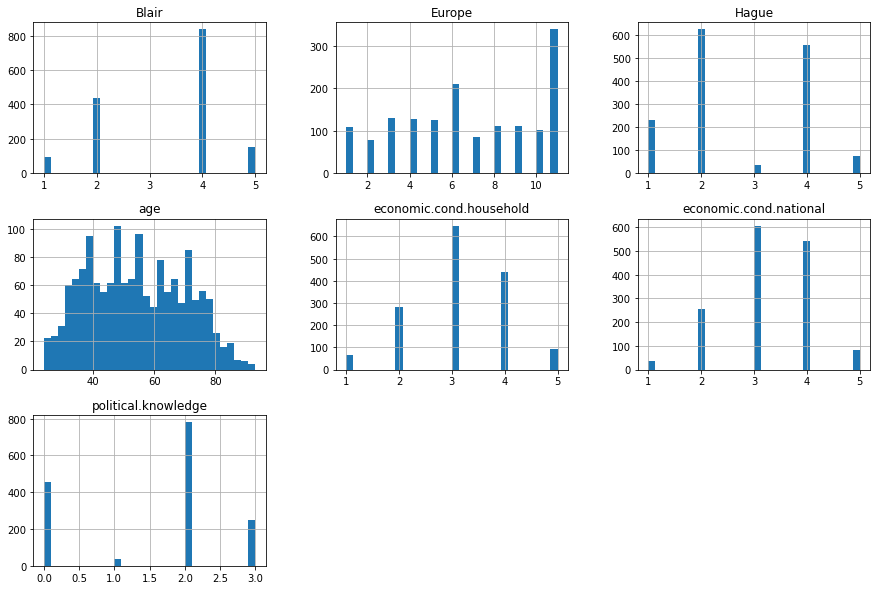

In [43]:
df.hist(bins=30, figsize=(15, 10))

Observation of histogram:
1. None of the independent variable shows normal distribution of data. 
2. In Blair, level 4 shows highest response whereas in Hague, level 2 is at maximum.
3. Eurosceptic sentiment gets the maximum number of voters.
4. For age, data shows slight rightly skewed.
5. In both household and national economic condition, highest number of voters belongs to average economic condition.
6. In political knowledge level 2 shows maximum number of voters.

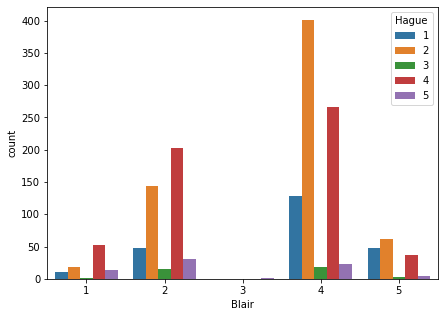

In [44]:
sns.countplot('Blair', data=df, hue='Hague')

In comparison between Blair and Hague, at level 1 of the Labour leader's assessment score, consevative leader's assessment shows mamximum at level 4.In level 2, it follows the same trend. Whereas at level 3 of Blair, only level 5 of Hague shows some values. In level 4 of Blair, there is level 2 at highest in Hague and same for level 5 of Blair. It shows that if assessment of Labour leader is lowest then assessment for conservative leader shows a bit high and vice versa.

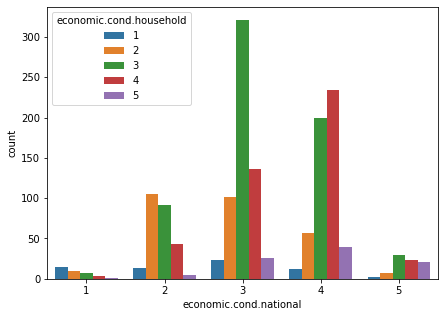

In [45]:
sns.countplot('economic.cond.national', data=df, hue='economic.cond.household')

In relation between national economic condition with household economic condition, it can be seen that from level 1 to 4 economic.cond.national, the highest among 5 different household economic level is belongs to the same category of national level except level 5 economic.cond.national where level 3 of ecnomic.cond.household reflects the maximum data points.

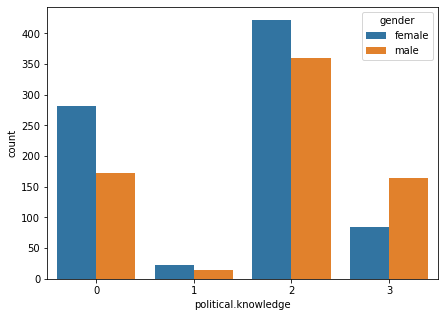

In [47]:
sns.countplot('political.knowledge', data=df, hue='gender')

Gender wise both male and female shows maximum towards level 2 of political knowledge. Whereas one remarkable thing is that male voters showing higher political knowledge level 3 than female.

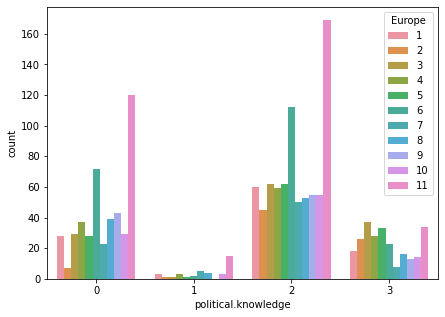

In [48]:
sns.countplot('political.knowledge', data=df, hue='Europe')

Overall trend shows here that majority of voters have ‘Eurosceptic’ sentiment irrespective of their knowledge about political positions on this topic. Only voters with political knowledge level 3 are not showing clear trend, they have slight higher towards non Eurosceptic sentiment. 

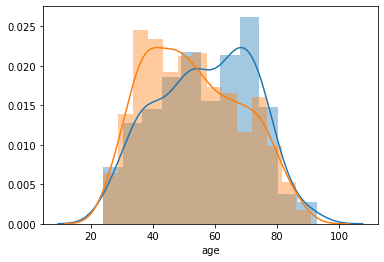

In [109]:
sns.distplot(df[df['vote'] == 'Conservative']['age'])
sns.distplot(df[df['vote'] == 'Labour']['age'])
plt.show()

Both Labour and Conservative party shows skewness in relaion to age. 

# Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

**Label Encoding for vote and gender as we can see there is clear difference between both classes and Splitting data into x and y**

In [85]:
## Converting the object Variables into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [87]:
df['vote'] = LE.fit_transform(df['vote'])
df['gender'] = LE.fit_transform(df['gender'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [88]:
X= df.drop('vote',axis=1)
y= df['vote']

In [89]:
from IPython.display import display
print(start+'Head of X'+end)
print(display(X.head()))
print(start+'Head of y'+end)
print(display(y.head()))

Head of X


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


None
Head of y


0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int32

None


**Train-Test Split**

In [90]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10,stratify=df['vote'])

**Scaling data and checking head**

In [93]:
from scipy.stats import zscore
X_train=X_train.apply(zscore)
X_test=X_test.apply(zscore)
print(start+"Head of scaled X_train data"+end)
print(display(X_train.head()))
print(start+"Head of scaled X_test data"+end)
print(display(X_test.head()))

Head of scaled X_train data


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1422,-0.569316,0.844627,0.928553,0.546201,-1.438902,0.372096,0.425319,-0.942600
338,0.768562,-1.411235,-0.147197,-1.998763,1.815594,1.284102,1.345838,1.060895
937,0.768562,1.972558,-0.147197,1.394523,-1.438902,-1.147914,0.425319,-0.942600
642,-1.078984,0.844627,0.928553,0.546201,1.001970,-1.147914,0.425319,1.060895
630,0.641145,0.844627,0.928553,0.546201,1.001970,-0.539910,0.425319,-0.942600


None
Head of scaled X_test data


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.748119,-0.269569,-0.159691,0.615971,-1.377380,-1.395104,0.416384,-0.924257
315,-1.384520,-0.269569,-2.310827,-1.104241,1.058296,0.719649,0.416384,1.081950
1334,-1.066319,-0.269569,-2.310827,-1.104241,1.058296,0.115434,0.416384,1.081950
650,-1.193600,0.884288,0.915877,0.615971,1.058296,-1.697211,-1.444141,-0.924257
1457,0.270123,-0.269569,-0.159691,-1.104241,-1.377380,1.323865,-1.444141,-0.924257


None
